## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.6.0


## Data

In [58]:
def get_fresh_mnist():
  # load Fashion MNIST from Keras repo
  fashion_mnist = tf.keras.datasets.fashion_mnist
  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

  # add extra dimension (to have one channel)
  x_train = x_train[:,:,:,None]
  x_test = x_test[:,:,:,None]

  x_train.shape, y_train.shape, x_test.shape, y_test.shape

  # Normalize values from [0, 255] to [0, 1] interval
  x_train = x_train / 255
  x_test = x_test / 255

  y_train = keras.utils.to_categorical(y_train, 10)
  y_test = keras.utils.to_categorical(y_test, 10)

  return x_train, y_train, x_test, y_test

In [47]:
clothes_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Plotting

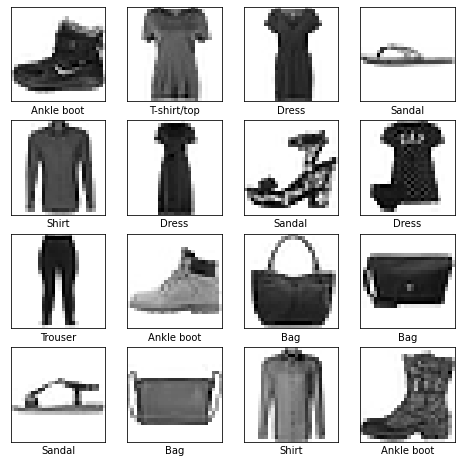

In [6]:
def plot_image(x, title = ""):
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x, cmap=plt.cm.binary)
  plt.xlabel(title)

plt.figure(figsize=(8,8))
for i in range(0, 160, 10):
  plt.subplot(4, 4, i // 10 + 1)
  plot_image(x_train[i].squeeze(), clothes_labels[y_train[i]])


## Dense Neural Network

In [59]:
x_train, y_train, x_test, y_test = get_fresh_mnist()

In [60]:
dnn_model = keras.Sequential([
      layers.Flatten(input_shape=(28,28)),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
])

dnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

dnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = dnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 2s 5ms/step - loss: 0.6115 - accuracy: 0.7903 - val_loss: 0.4728 - val_accuracy: 0.8359
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.4141 - accuracy: 0.8547 - val_loss: 0.4205 - val_accuracy: 0.8518
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3726 - accuracy: 0.8678 - val_loss: 0.4047 - val_accuracy: 0.8549
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3461 - accuracy: 0.8766 - val_loss: 0.3829 - val_accuracy: 0.8622
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3248 - accuracy: 0.8829 - val_loss: 0.3625 - val_accuracy: 0.8699
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3050 - accuracy: 0.8890 - val_loss: 0.3654 - val_accuracy: 0.8685
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.2977 - accuracy: 0.8911 - val_loss: 0.3601 - val_accuracy: 0.8712
Epoch 

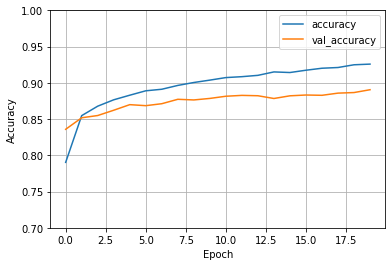

In [62]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

plot_loss(history, ylim=(0.7, 1))

## Convolutional Neural Network

In [63]:
cnn_model = keras.Sequential([
      layers.Conv2D(input_shape=(28,28,1), filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Dropout(0.5),
      layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_23 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_11 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)              

Epoch 1/20
235/235 [==============================] - 6s 24ms/step - loss: 0.6386 - accuracy: 0.7717 - val_loss: 0.3853 - val_accuracy: 0.8588
Epoch 2/20
235/235 [==============================] - 5s 22ms/step - loss: 0.4083 - accuracy: 0.8557 - val_loss: 0.3494 - val_accuracy: 0.8700
Epoch 3/20
235/235 [==============================] - 5s 22ms/step - loss: 0.3559 - accuracy: 0.8722 - val_loss: 0.3046 - val_accuracy: 0.8871
Epoch 4/20
235/235 [==============================] - 5s 22ms/step - loss: 0.3203 - accuracy: 0.8834 - val_loss: 0.2837 - val_accuracy: 0.8966
Epoch 5/20
235/235 [==============================] - 5s 22ms/step - loss: 0.2921 - accuracy: 0.8938 - val_loss: 0.2670 - val_accuracy: 0.8971
Epoch 6/20
235/235 [==============================] - 5s 23ms/step - loss: 0.2738 - accuracy: 0.9013 - val_loss: 0.2623 - val_accuracy: 0.9016
Epoch 7/20
235/235 [==============================] - 5s 22ms/step - loss: 0.2509 - accuracy: 0.9083 - val_loss: 0.2474 - val_accuracy: 0.9087

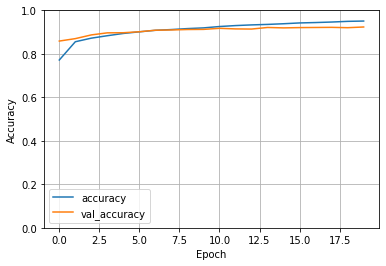

In [64]:
x_train, y_train, x_test, y_test = get_fresh_mnist()

history_cnn1 = cnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

plot_loss(history_cnn1, ylim=(0.0, 1))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_25 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_12 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)              

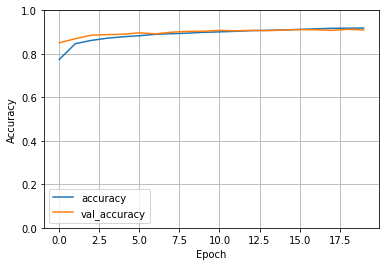

In [65]:
x_train, y_train, x_test, y_test = get_fresh_mnist()

# playing with L2 loss -› WORSE

from keras import regularizers
l2_loss_lambda = 0.0002
cnn_model = keras.Sequential([
      layers.Conv2D(input_shape=(28,28,1), filters = 32, kernel_size = (3,3), 
                    activation = 'relu', kernel_regularizer=regularizers.l2(l2_loss_lambda)),
      layers.Dropout(0.5),
      layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', 
                    kernel_regularizer=regularizers.l2(l2_loss_lambda)),
      layers.Flatten(),
      layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_loss_lambda)),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

cnn_model.summary()

history = cnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

plot_loss(history, ylim=(0.0, 1))

In [68]:
def plot_loss_double(history1, history2, ylim=(0,1)):
  # plt.plot(history.history1['accuracy'], label='accuracy')
  plt.plot(history1.history['val_accuracy'], label='cnn v1 + Dropout')
  # plt.plot(history.history2['accuracy'], label='accuracy')
  plt.plot(history2.history['val_accuracy'], label='cnn v1 + Dropout + L2')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

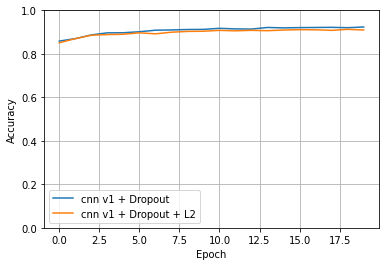

In [69]:
# L2 makes v1 model worse!

plot_loss_double(history_cnn1, history)

# Bonus Tasks

##Confusion Matrix 

In [16]:
import seaborn as sn
# confusion matrix 
# predictions = cnn_model.predict(x_test)
predictions = dnn_model.predict(x_test)
classes_x = np.argmax(predictions,axis=-1)
labels = np.argmax(y_test,axis=-1)
assert classes_x.shape == labels.shape

cm = tf.math.confusion_matrix(labels, classes_x)

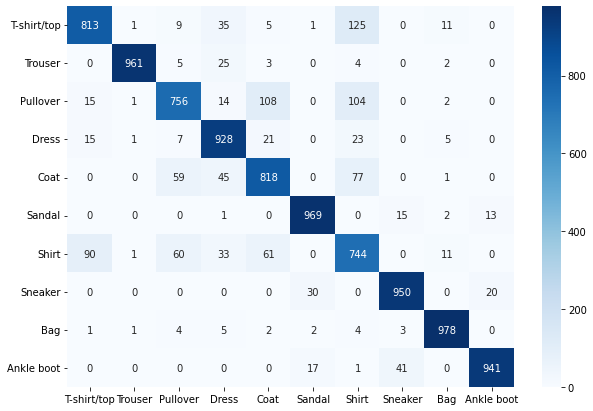

In [17]:
# df_cm = pd.DataFrame(cm).astype(float)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g', yticklabels=clothes_labels, xticklabels=clothes_labels)


##Most Uncertain Predictions

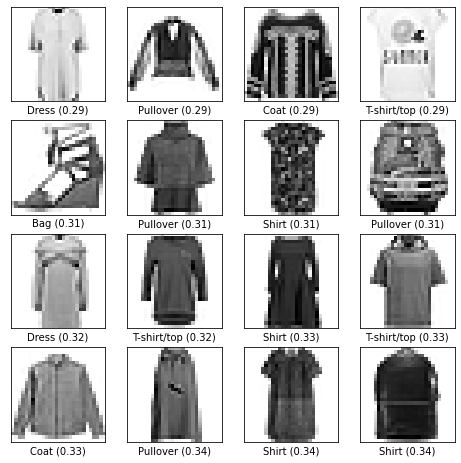

In [18]:
# take highest number in each prediction
uncertain_idx = np.argmax(predictions, -1)
uncertain_predictions = np.take_along_axis(predictions, uncertain_idx[:,None], axis=1).flatten()

# sort & take lowest n (of all highest numbers in predictions)
n = 16
sorted_idx = uncertain_predictions.argsort()[:n]

# plot 
def format_label(txt, val):
  return '{} ({:.2f})'.format(txt, val)

plt.figure(figsize=(8,8))
for i in range(0, 160, 10):
  plt.subplot(4, 4, i // 10 + 1)
  
  # pick the sorted uncertain samples
  j = sorted_idx[i // 10]
  plot_image(x_test[j].squeeze(), format_label(
      clothes_labels[np.argmax(predictions[j,:], axis=-1)],
      predictions[j, np.argmax(predictions[j,:], axis=-1)]))

## Highest Probability - Wrong Label

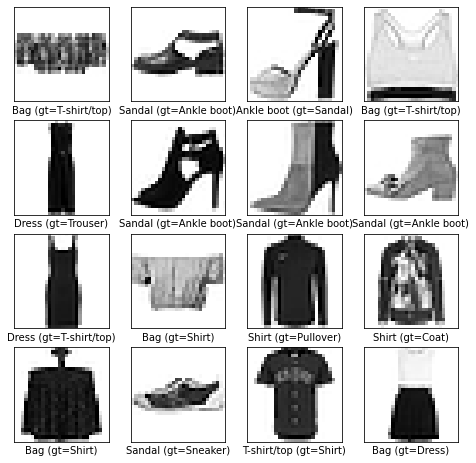

In [19]:
# identify misclassified samples
misclassified_idx = np.where(classes_x != labels)[0]

# get prediction value from all samples and get sorted index
max_in_row_idx = np.argmax(predictions, axis=-1)
max_args = np.take_along_axis(predictions, max_in_row_idx[:,None], axis=1).flatten()
sorted_max_args_desc = max_args.argsort()[::-1]

# filter misclassified samples from surest predictions 
mask = np.isin(sorted_max_args_desc, misclassified_idx)
misclass_sorted_desc = sorted_max_args_desc[mask]

# plot
n_idx = misclass_sorted_desc[:n]

def format_label(txt, val):
  return '{} (gt={})'.format(txt, val)

plt.figure(figsize=(8,8))
for i in range(0, 160, 10):
  plt.subplot(4, 4, i // 10 + 1)
  
  # pick the sorted uncertain samples
  j = n_idx[i // 10]
  plot_image(x_test[j].squeeze(), format_label(
      clothes_labels[np.argmax(predictions[j,:], axis=-1)],
      clothes_labels[labels[j]]))

# Alternative models

In [70]:
# Viz:
# https://medium.com/@mjbhobe/classifying-fashion-with-a-keras-cnn-achieving-94-accuracy-part-2-a5bd7a4e7e5a

# Vychází z předpokladu, že model je overfitlý na testovací data (což je). 
# Řešením je tedy regularizace pomocí dropoutu a L2.

def build_model_l2_do(l2_loss_lambda=None):
    """
    build a Keras model with both L2 and Dropout regularization
    """

    l2 = None if l2_loss_lambda is None else regularizers.l2(l2_loss_lambda)
    if l2 is not None:
        print('Using L2 regularization - l2_loss_lambda = %.7f' % l2_loss_lambda)
    
    model = keras.Sequential([
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2,
               input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.20),

        layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2),
        layers.BatchNormalization(),
        layers.Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.30),        
        
        layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2),
        layers.BatchNormalization(),
        layers.Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2),
        layers.BatchNormalization(),    
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.40),        
        
        layers.Flatten(),
        
        layers.Dense(1024, activation='relu', kernel_regularizer=l2),
        layers.Dropout(0.30),
        
        layers.Dense(512, activation='relu', kernel_regularizer=l2),
        layers.Dropout(0.20),
        
        layers.Dense(10, activation='softmax')
    ])
    
    adam = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6)
    model.compile(optimizer=adam,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Using L2 regularization - l2_loss_lambda = 0.0002000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_24 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
batch_normalization_25 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 128)     

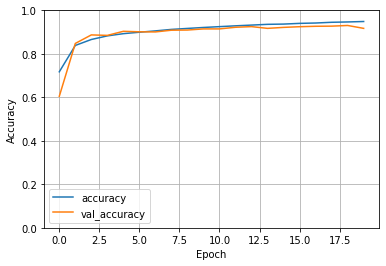

In [75]:
x_train, y_train, x_test, y_test = get_fresh_mnist()

l2_loss_lambda_2 = 0.0002
model_v2 = build_model_l2_do(l2_loss_lambda=l2_loss_lambda_2)
print(model_v2.summary())

history_cnn2 = model_v2.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

plot_loss(history_cnn2, ylim=(0.0, 1))

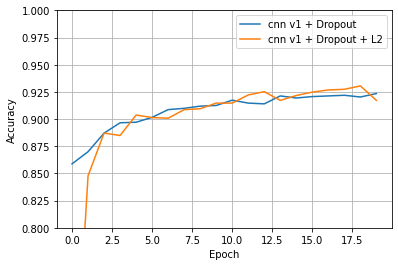

In [76]:
# v2 model is better

plot_loss_double(history_cnn1, history_cnn2, ylim=(0.8, 1))


#Reduce overfitting on low-level feature by random erasing

In [77]:
# Improve by random erasing
# https://github.com/yu4u/cutout-random-erasing

def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    """
    p : the probability that random erasing is performed
    s_l, s_h : minimum / maximum proportion of erased area against input image
    r_1, r_2 : minimum / maximum aspect ratio of erased area
    v_l, v_h : minimum / maximum value for erased area
    pixel_level : pixel-level randomization for erased area
    """
    def eraser(input_img):
        if input_img.ndim == 3:
            img_h, img_w, img_c = input_img.shape
        elif input_img.ndim == 2:
            img_h, img_w = input_img.shape

        p_1 = np.random.rand()
        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            if input_img.ndim == 3:
                c = np.random.uniform(v_l, v_h, (h, w, img_c))
            if input_img.ndim == 2:
                c = np.random.uniform(v_l, v_h, (h, w))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w] = c
        return input_img

    return eraser

Using L2 regularization - l2_loss_lambda = 0.0002000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
235/235 [==============================] - 21s 85ms/step - loss: 1.3630 - accuracy: 0.6384 - val_loss: 3.3061 - val_accuracy: 0.1000
Epoch 2/50
235/235 [==============================] - 20s 83ms/step - loss: 0.9540 - accuracy: 0.7790 - val_loss: 1.9158 - val_accuracy: 0.5089
Epoch 3/50
235/235 [==============================] - 20s 83ms/step - loss: 0.8403 - accuracy: 0.8222 - val_loss: 0.8210 - val_accuracy: 0.8209
Epoch 4/50
235/235 [==============================] - 20s 84ms/step - loss: 0.7706 - accuracy: 0.8454 - val_loss: 0.6850 - val_accuracy: 0.8762
Epoch 5/50
235/235 [==============================] - 20s 84ms/step - loss: 0.7252 - accuracy: 0.8613 - val_loss: 0.6551 - val_accuracy: 0.8856
Epoch 6/50
235/235 [==============================] - 20s 84ms/step - loss: 0.6891 - accuracy: 0.8720 - val_loss: 0.6358 - val_accuracy: 0.8888
Epoch 7/50
235/235 [==============================] - 20s 84ms/step - loss: 0.6645 - accuracy: 0.8780 - val_loss: 0.6253 - val_accuracy:

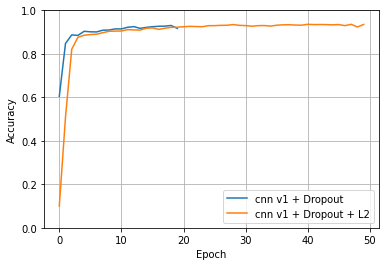

In [79]:
# run random erasing with the best model
import copy

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

eraser = get_random_eraser(s_h=0.2)
new_x_train = copy.deepcopy(x_train)

for i in range(x_train.shape[0]):
    new_x_train[i,...] = eraser(new_x_train[i,...])

x_train = new_x_train

x_train = x_train[:,:,:,None]
x_test = x_test[:,:,:,None]

x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

l2_loss_lambda_2 = 0.0002
model_v2_re = build_model_l2_do(l2_loss_lambda=l2_loss_lambda_2)


history_cnn2_re = model_v2_re.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 50,
  validation_data = (x_test, y_test),
  verbose = 1
)

plot_loss_double(history_cnn2, history_cnn2_re, ylim=(0.0, 1))

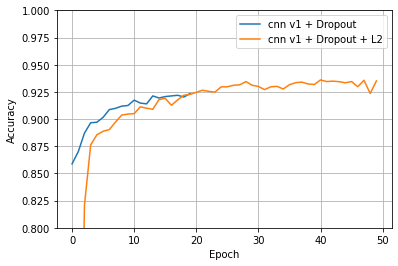

In [80]:
plot_loss_double(history_cnn1, history_cnn2_re, ylim=(0.8, 1))